In [3]:
from collections import Counter, defaultdict
from itertools import combinations 
import pandas as pd
import numpy as np
import operator
import math
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("data_cleaned.csv")

In [5]:
len(df)

1476

In [6]:
df.head()

,Latitude,Longitude,Started,Extinguished,Days Elapsed,AcresBurned,MajorIncident,Average Temp F,uvIndex,sunHour,totalSnow_cm,AirTankers,CalFireIncident,Counties,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
0,37.86,-120.09,2013-08-17,2013-09-06,20,257314.0,False,73.0,7,13.3,0.0,0.0,True,Tuolumne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.59,-118.42,2013-05-30,2013-06-08,9,30274.0,False,70.5,7,14.5,0.0,0.0,True,Los Angeles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.71,-116.73,2013-07-15,2013-07-30,15,27531.0,False,77.0,7,14.1,0.0,0.0,True,Riverside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.12,-120.65,2013-08-10,2013-08-30,20,27440.0,False,60.5,6,13.9,0.0,0.0,False,Placer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.28,-119.32,2013-07-22,2013-09-24,64,22992.0,False,67.5,6,14.5,0.0,0.0,False,Fresno,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Classification**

In [20]:
Xc = df[["Average Temp F", "uvIndex", "sunHour", "totalSnow_cm"]]
yc = df[["MajorIncident"]]

In [21]:
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score

data = Xc_tr
target = yc_tr

clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(data, target)

print(clf.score(data, target))

0.7677966101694915


In [32]:
y_true = yc_te.iloc[:, 0].to_numpy()
y_pred = clf.predict(Xc_te)
print(accuracy_score(y_true, y_pred))

0.7364864864864865


In [33]:
Xc2 = df[["Latitude", "Longitude", "Average Temp F", "uvIndex", "sunHour", "totalSnow_cm"]]
yc2 = df[["MajorIncident"]]

In [34]:
Xc_tr2, Xc_te2, yc_tr2, yc_te2 = train_test_split(Xc2, yc2, test_size=0.2, random_state=42)

In [35]:
indices = Xc_te2.index

In [37]:
data2 = Xc_tr2
target2 = yc_tr2

clf2 = tree.DecisionTreeClassifier(max_depth=6)
clf2 = clf2.fit(data2, target2)

print(clf2.score(data2, target2))

0.8177966101694916


In [38]:
y_true2 = yc_te2.iloc[:, 0].to_numpy()
y_pred2 = clf2.predict(Xc_te2)
print(accuracy_score(y_true2, y_pred2))

0.7364864864864865


In [39]:
frame = {'Index':indices, 'Incident_DecisionTree':y_pred2}
result = pd.DataFrame(frame)
result

,Index,Incident_DecisionTree
0,1125,False
1,184,True
2,1226,False
3,67,False
4,220,False
...,...,...
291,950,False
292,997,False
293,1131,False
294,1159,True


In [40]:
result.to_csv('DecisionTreePredictions.csv', index=False)

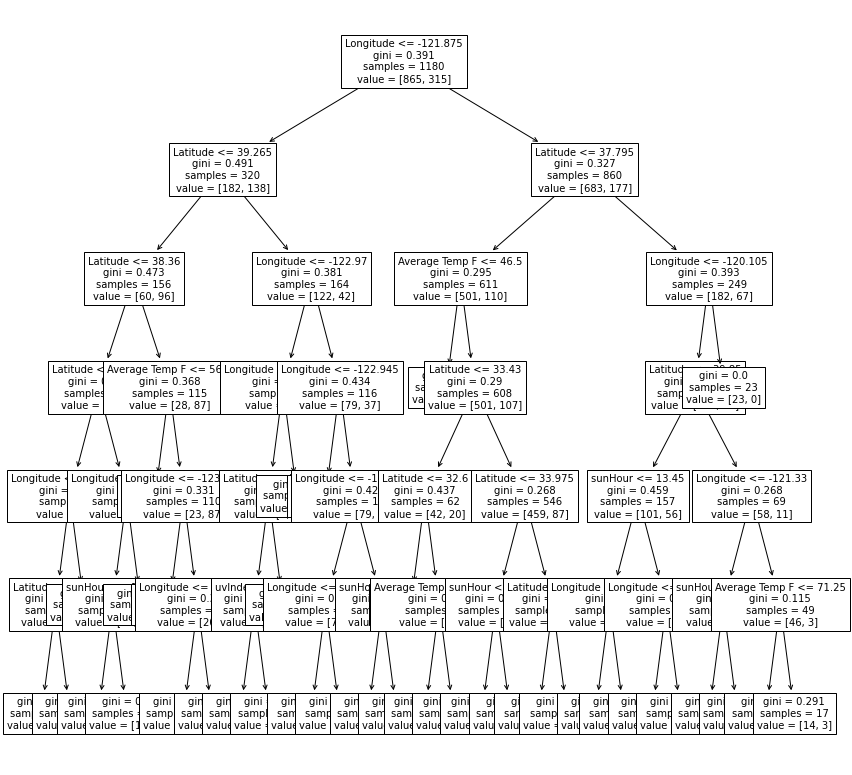

In [41]:
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf2, fontsize=10, feature_names=data2.columns);

In [42]:
clf2.tree_.node_count

71

# **Regression**

In [43]:
import numpy as np 
import pandas as pd
from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn import linear_model as lm 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
Xr = df.drop(columns = ["Days Elapsed", "AcresBurned", "Started", "Extinguished", "Counties"])
yrd = df[["Days Elapsed"]]
yrb = df[["AcresBurned"]]

In [45]:
Xr.head()

,Latitude,Longitude,MajorIncident,Average Temp F,uvIndex,sunHour,totalSnow_cm,AirTankers,CalFireIncident,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
0,37.86,-120.09,False,73.0,7,13.3,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.59,-118.42,False,70.5,7,14.5,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.71,-116.73,False,77.0,7,14.1,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.12,-120.65,False,60.5,6,13.9,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.28,-119.32,False,67.5,6,14.5,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#regression for days elapsed train test split
Xrd_tr, Xrd_te, yrd_tr, yrd_te = train_test_split(Xr, yrd, test_size=0.2, random_state=42)

#regression for acres burned train test split
Xrb_tr, Xrb_te, yrb_tr, yrb_te = train_test_split(Xr, yrb, test_size=0.2, random_state=42)

In [51]:
data3 = Xrd_tr
target3 = yrd_tr

parameters = {'max_depth':range(3,20)}
dtr = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
dtr = dtr.fit(data3, target3)

print(dtr.score(data3, target3))

0.19043875098558105


In [52]:
y_true3 = yrd_te.iloc[:, 0].to_numpy()
y_pred3 = dtr.predict(Xrd_te)
print(r2_score(y_true3, y_pred3))
print(np.sqrt(mean_squared_error(y_true3, y_pred3)))

0.0950965695442888
87.44798454433172


In [53]:
data4 = Xrb_tr
target4 = yrb_tr

dtr2 = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
dtr2 = dtr2.fit(data4, target4)

print(dtr2.score(data4, target4))

0.9241224531296726


In [54]:
y_true4 = yrb_te.iloc[:, 0].to_numpy()
y_pred4 = dtr2.predict(Xrb_te)
print(r2_score(y_true4, y_pred4))
print(np.sqrt(mean_squared_error(y_true4, y_pred4)))

0.9814397780947471
8144.421323089837
